<a href="https://colab.research.google.com/github/Uzmamushtaque/CSCI4962-Projects-ML-AI/blob/main/Lecture_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 13

# Topics for today

1. Generative Adversarial Networks (GANs)
2. Applications of GANs

Before introducing GANs, lets discuss the notion of generative and discriminative models.

There are 2 types of learning models:

1. Discriminative models:These directly estimate the conditional probability $P(y|X)$ of the label $y$ given feature values in $X$.

2. Generative models: These estimate the joint probability $P(X,y)$ which is a generative probability of a data instance. This joint probability can be used to estimate the conditional probability of $y$ given $X$ by using Bayes rule.

# Naive Bayes Classifier

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable.

Naive Bayes is an example of a generative model.

For example, Naive Bayes works by summarizing the probability distribution of each input variable and the output class. When a prediction is made, the probability for each possible outcome is calculated for each variable, the independent probabilities are combined, and the most likely outcome is predicted. Used in reverse, the probability distributions for each variable can be sampled to generate new plausible (independent) feature values.

[Source](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

# Introduction
GANs are an approach to generative modeling using deep learning methods, such as convolutional neural networks.

Generative modeling is an unsupervised learning task in machine learning that involves automatically discovering and learning the regularities or patterns in input data in such a way that the model can be used to generate or output new examples that plausibly could have been drawn from the original dataset.

Other examples of generative models include Latent Dirichlet Allocation, or LDA, and the Gaussian Mixture Model, or GMM.

Deep learning methods can be used as generative models. Two popular examples include the Restricted Boltzmann Machine, or RBM, and the Deep Belief Network, or DBN.

Two modern examples of deep learning generative modeling algorithms include the Variational Autoencoder, or VAE, and the Generative Adversarial Network, or GAN.

## GANs

GANs work with 2 Neural Network Models simultaneously.

Generative model produces synthetic examples of objects that are very close to real data. The second network called the discriminative model (trained on real labeled data to determine if the images are fake or real) takes inputs from the generator as well as a real database to classify objects as real or fake.

When the discriminative network is correctly able to flag a synthetic object as fake (the fact that is used by the generative model to update weights) so that the discriminative model will have hard time classifying samples generated from it. After updating weights of the generator network, new samples are generated by it and the process is repeated.

For the approach to work, the discriminator should be a high capacity model and should have access to large amount of data.

## Training GANs

The training proceeds by alternately updating the parameters of the generator and the discriminator. Both are neural networks. The discriminator takes a d-dimensional input and produces a single output(0,1). The generator takes input noise samples from a probability distribution to generate d-dimensional examples of the data (very similar to variational autoencoders). For training, instead of using reconstruction error, the discriminator error is used to train the generator to create samples like the input data distribution.

SGA is used for learning parameters of the discriminator and SGD is used for learning paramters of the generator. In practice $k$ steps of the discriminator are used for 1 step of the generator. Gradient update steps are as follows:

1. (Repeat this $k$-times): A mini-batch of size 2.$m$ is created with equal number of real and synthetic examples. The synthetic examples must be created by inputting noise samples to the generator from a prior distribution whereas real samples are created from a base dataset. SGA (Stochastic gradient ascent) is performed on the parameters of the disciminator to maximize the likelihood that the discriminator correctly classifies the real and synthetic examples. For each update step, this is achieved by performing backpropagation on the discriminator network with respect to the mini-batch of 2.$m$ examples.

2. (Perform once): Hook up the discriminator at the end of the generator. Provide the generator with $m$ noise inputs to create $m$ synthetic examples.
Perform SGD on the parameters of the generator so as to minimize the likelihood that the discriminator correctly classifies synthetic examples. the minimization of $log(1-D(X))$ in the loss function explicitly encourages the syntetic examples to be classified as real.

Although the discriminator is attached to the generator, the gradient updates (during backprop) are performed with respect to the parameters of the of only the generator network. Backpropagation will compute the gradients w.r.t. both the networks (for this attached configuration) but only the parameters of the generator will be updated in this step.

The value of $k$ is typically small(less than 5) and sometimes k=1 is a valid choice. This iterative process is repeated until convergence (also called the Nash equilibrium).

# Conditional GANs

Both the generator and the discriminator are conditioned on additional input object e.g. a label, a caption or another object of the same type. These are sometimes referred to as contexts. The contexts are typically related to the target objects in some domain specific way, which is learned by the model.

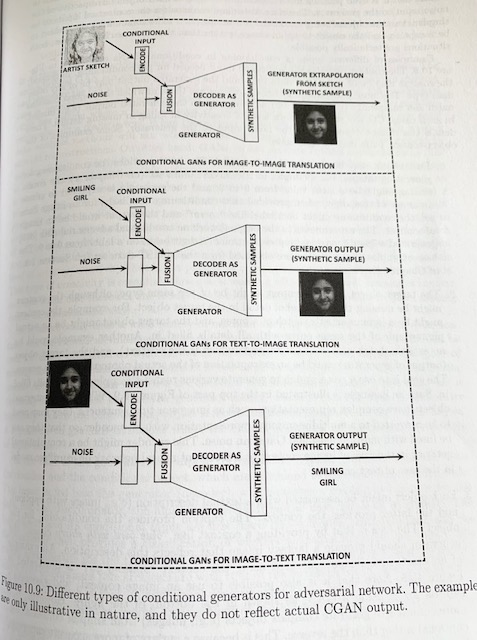

# Cycle GAN

Training a model for image-to-image translation typically requires a large dataset of paired examples. These datasets can be difficult and expensive to prepare, and in some cases impossible, such as photographs of paintings by long dead artists.

Examples of image-to-image translation include:

Translating summer landscapes to winter landscapes (or the reverse).

Translating paintings to photographs (or the reverse).

Translating horses to zebras (or the reverse).

There is a desire for techniques for training an image-to-image translation system that does not require paired examples. Specifically, where any two collections of unrelated images can be used and the general characteristics extracted from each collection and used in the image translation process.

The CycleGAN is a technique that involves the automatic training of image-to-image translation models without paired examples. The models are trained in an unsupervised manner using a collection of images from the source and target domain that do not need to be related in any way.

[Source](https://machinelearningmastery.com/what-is-cyclegan/)

# RecGans



[Source](https://dl.acm.org/doi/pdf/10.1145/3240323.3240383?casa_token=lGrYK8rxMIMAAAAA:sifrGW2oDB2RQfG22JIfFvZGKxEpXJ3yhctLz8Sg21H5qeB5kIjA6F-9ltNUCSv_wa7R7b7iDw1unA)

# References

[Paper 1](https://arxiv.org/pdf/1406.2661.pdf)

[Paper 2](https://arxiv.org/pdf/1511.06434.pdf)

[Paper 3](https://arxiv.org/pdf/1703.10593.pdf)

[Example of Backprop in GANs](https://datascience.stackexchange.com/questions/32066/could-someone-explain-to-me-how-back-prop-is-done-for-the-generator-in-a-gan)

# Implementing GANs using Tensorflow

[Link](https://www.tensorflow.org/tutorials/generative/dcgan)